In [6]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plot

In [2]:
file_name_bbc = 'BBC_reading/exсel_files/bbc_scraping.xlsx'
file_name_nz = 'BBC_reading/exсel_files/zn_ua_scraping.xlsx'
file_name_csv = '../sas/report/report_final.csv'

csv_final_report = pd.read_csv(file_name_csv)
excel_bbc_texts = pd.read_excel(file_name_bbc, index_col=0)
excel_nz_texts = pd.read_excel(file_name_nz, index_col=0)

In [85]:
csv_final_report.head

<bound method NDFrame.head of      file_code  pass  is_fail_doc  \
0        bbc_0     1            0   
1        bbc_0     1            0   
2        bbc_0     1            0   
3        bbc_0     1            0   
4        bbc_0     1            0   
...        ...   ...          ...   
8343    zn_874     1            0   
8344    zn_874     1            0   
8345    zn_874     1            0   
8346    zn_874     1            0   
8347    zn_874     1            0   

                                          category_name  relevancy  \
0                         Top/politics/healthcarepolicy        1.0   
1     Top/politics/healthcarepolicy/quarntine_streng...        1.0   
2                                            Top/events        1.0   
3                          Top/events/onlinetransformed        1.0   
4                              Top/economy/coronacrisis        1.0   
...                                                 ...        ...   
8343          Top/politics/healthca

In [86]:
excel_bbc_texts.head

<bound method NDFrame.head of            Date           Author  Main_Topics  \
0    22/03/2020              NaN     Здоров'я   
1    22/03/2020              NaN     Здоров'я   
2    22/03/2020              NaN     Здоров'я   
3    22/03/2020  Ольга Паламарюк     Здоров'я   
4    22/03/2020   BBC Моніторинг     Здоров'я   
..          ...              ...          ...   
828         NaN    Георгій Ерман  Коронавірус   
829         NaN              NaN  Коронавірус   
830         NaN    Георгій Ерман    Економіка   
831   8/05/2020    Джонатан Амос        Наука   
832   9/05/2020              NaN     Здоров'я   

                                                 Topic  \
0    Надія є: п'ять причин порадіти під час пандемі...   
1           Маски: щоб захистити інших, а не вас - МОЗ   
2       Коронавірус: як у світі запроваджують карантин   
3    "Коли тобі кажуть: у тебе - коронавірус". Розп...   
4        Ібупрофен і Covid-19: міфи та правда про ліки   
..                               

In [87]:
excel_nz_texts.head

<bound method NDFrame.head of             Date  Author Main_Topics  \
0     05/04/2020     NaN    Політика   
1     05/04/2020     NaN    Політика   
2     05/04/2020     NaN    Політика   
3     05/04/2020     NaN    Політика   
4     05/04/2020     NaN    Політика   
...          ...     ...         ...   
2706   9/05/2020     NaN     Україна   
2707   9/05/2020     NaN     Україна   
2708   9/05/2020     NaN     Україна   
2709   9/05/2020     NaN     Україна   
2710   9/05/2020     NaN     Україна   

                                                  Topic  \
0     Постпред України в ООН розповів, як Росія пере...   
1     З початку року в Донбасі 12 осіб загинули від ...   
2     Людина Ахметова стала позаштатним радником пре...   
3          НАБУ завершило розслідування справи Гримчака   
4                           НАБУ допитало Дениса Єрмака   
...                                                 ...   
2706  Венедиктова заявила про самовідвід зі справи С...   
2707  Коронавірус

In [3]:
name_colums_for_new_csv = ['file_code', 'class', 'date']
new_csv = pd.DataFrame(zip(csv_final_report.file_code, csv_final_report.category_name, csv_final_report.date), columns=name_colums_for_new_csv)

In [43]:
new_csv.head

,file_code,pass,is_fail_doc,category_name,relevancy,above_rel_cutoff,date
8000,zn_758,1,0,Top/coronavirus,1.0,1,04May2014 11:24:33.0
8001,zn_758,1,0,Top/technologies,1.0,1,04May2014 11:24:33.0
8002,zn_759,1,0,Top/politics,1.0,1,04May2014 11:24:33.0
8003,zn_759,1,0,Top/coronavirus,1.0,1,04May2014 11:24:33.0
8004,zn_760,1,0,Top/politics/healthcarepolicy/entertaiment,1.0,1,04May2014 11:24:33.0
...,...,...,...,...,...,...,...
8343,zn_874,1,0,Top/politics/healthcarepolicy/safetysteps,1.0,1,04May2014 11:24:33.0
8344,zn_874,1,0,Top/politics/healthcarepolicy/entertaiment,1.0,1,04May2014 11:24:33.0
8345,zn_874,1,0,Top/health/recover,1.0,1,04May2014 11:24:33.0
8346,zn_874,1,0,Top/health,1.0,1,04May2014 11:24:33.0


In [4]:
for index in range(len(csv_final_report)):
    source_name = (re.findall('zn|bbc',new_csv.loc[index][0]))[0]
    count_in_table = re.findall('_\d{0,10}', new_csv.loc[index][0])
    count_in_table = int(count_in_table[0].replace('_', ''))
    
    if source_name == 'bbc':
        new_csv.loc[index][2] = pd.to_datetime(excel_bbc_texts.loc[count_in_table]['Date'], format='%d/%m/%Y', dayfirst=True)
    elif source_name == 'zn':
        new_csv.loc[index][2] = pd.to_datetime(excel_nz_texts.loc[count_in_table]['Date'], format='%d/%m/%Y', dayfirst=True)
    

In [7]:
def preparation():
    
    for index in range(len(csv_final_report)):
        source_name = (re.findall('zn|bbc',new_csv.loc[index][0]))[0]
        count_in_table = re.findall('_\d{0,10}', new_csv.loc[index][0])
        count_in_table = int(count_in_table[0].replace('_', ''))

        if source_name == 'bbc':
            new_csv.loc[index][2] = pd.to_datetime(excel_bbc_texts.loc[count_in_table]['Date'], format='%d/%m/%Y', dayfirst=True)
        elif source_name == 'zn':
            new_csv.loc[index][2] = pd.to_datetime(excel_nz_texts.loc[count_in_table]['Date'], format='%d/%m/%Y', dayfirst=True)
    
    my_classes = list(set(new_csv['class']))
    len_my_classes = len(my_classes)
    
    my_classes.append('start_period')
    my_classes.append('end_period')
    return my_classes,len_my_classes

In [8]:
my_classes, len_my_classes = preparation()

In [9]:
def create_result_table(name_colums_for_new_csv, my_classes, days_period, first_day, last_day):
    
    all_source_for_bars = pd.DataFrame(columns=my_classes)
    
    last_day = pd.to_datetime(last_day,format='%d/%m/%Y')
    start_period = pd.to_datetime(first_day,format='%d/%m/%Y')
    period_time = pd.Timedelta(days=days_period)
    bool_parametr = True
    
    while bool_parametr:
        end_period = start_period + period_time
        
        if end_period >= last_day:
            bool_parametr = False
            end_period = last_day
            break
        
        counts_dateFrame = pd.DataFrame(columns=name_colums_for_new_csv)
        counts_list = np.array([])
        for index,name_class in enumerate(my_classes):
            if name_class == 'start_period':
                counts_list = np.append(counts_list, start_period)
                counts_list = np.append(counts_list, end_period)
                break

            counts_dateFrame = new_csv[(new_csv['class'] == name_class) & (start_period <= new_csv['date']) & (new_csv['date'] <= end_period)]
            # print(counts_dateFrame.head)
            count = len(counts_dateFrame)

            # print(f"count\t{count}\nindex\t{index}")
            counts_list = np.append(counts_list, count)

        temp_count_table = pd.DataFrame([counts_list],columns=my_classes) 
        all_source_for_bars = all_source_for_bars.append(temp_count_table, ignore_index=True)
        
        start_period = end_period + pd.Timedelta(days=1)
    
    return all_source_for_bars

In [10]:
days_period = 3 
first_day = '03/03/2020' 
last_day = '03/05/2020'
all_source_bars = create_result_table(name_colums_for_new_csv, my_classes, days_period, first_day, last_day)

In [11]:
all_source_bars.head

<bound method NDFrame.head of     Top/society/potentialdeathhisteria  Top/society/producthisteria  \
0                                  0.0                          0.0   
1                                  0.0                          1.0   
2                                  1.0                          0.0   
3                                  0.0                          2.0   
4                                  3.0                          2.0   
5                                  3.0                          1.0   
6                                  3.0                          6.0   
7                                  6.0                          3.0   
8                                  5.0                          0.0   
9                                  2.0                          3.0   
10                                 2.0                          0.0   
11                                 2.0                          0.0   
12                                 2.0         

In [12]:
res_without_dates = all_source_bars.drop(['start_period','end_period'], axis=1)
res_without_dates.head

<bound method NDFrame.head of     Top/science/existeddrugs  Top/economy/coronabusiness  \
0                        0.0                         0.0   
1                        1.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         1.0   
4                        0.0                         3.0   
5                        2.0                         3.0   
6                        3.0                         0.0   
7                       12.0                         2.0   
8                       10.0                         2.0   
9                        5.0                         0.0   
10                       4.0                         1.0   
11                       4.0                         1.0   
12                       3.0                         3.0   
13                       1.0                         1.0   
14                       2.0                         0.0   

    Top/p

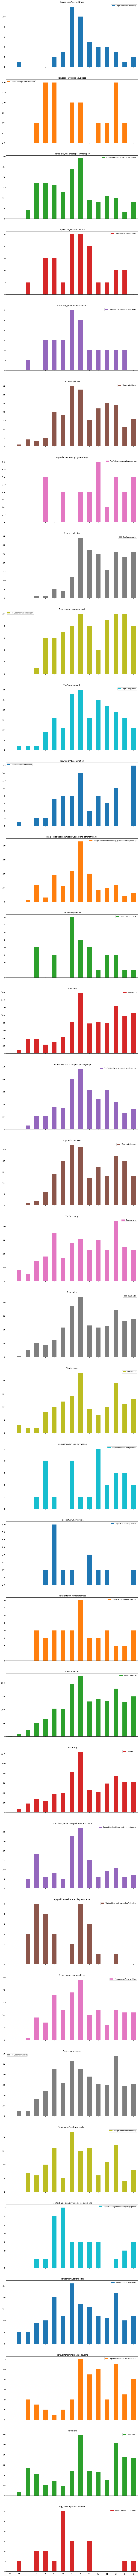

In [13]:
ax = res_without_dates.plot(kind='bar', figsize=(15, 300), legend=True, fontsize=12, subplots=True)

In [14]:
ax1 = res_without_dates.plot(kind='bar', figsize=(500, 150), legend=True, fontsize=12)


In [ ]:
days_period = 7 
all_source_bars = create_result_table(name_colums_for_new_csv, my_classes, days_period, first_day, last_day)
res_without_dates = all_source_bars.drop(['start_period','end_period'], axis=1)


In [ ]:
ax = res_without_dates.plot(kind='bar', figsize=(15, 300), legend=True, fontsize=12, subplots=True)

In [ ]:
ax1 = res_without_dates.plot(kind='bar', figsize=(500, 150), legend=True, fontsize=12)


In [18]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant','rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,'lifespan': lifespan}, index=index)

In [19]:
df

,speed,lifespan
snail,0.1,2.0
pig,17.5,8.0
elephant,40.0,70.0
rabbit,48.0,1.5
giraffe,52.0,25.0
coyote,69.0,12.0
horse,88.0,28.0


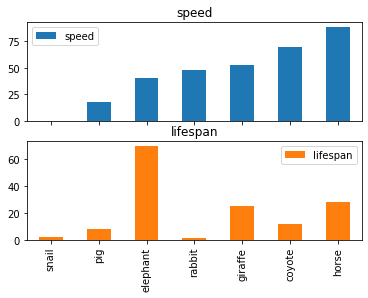

In [55]:
axes = df.plot.bar(subplots=True)
